## The Core Idea of Regression

At its heart, regression analysis seeks to build a mathematical model that describes the relationship between variables. This allows us to move from simply observing data to predicting an outcome. For example, given data on house sizes and their sale prices, a regression model could learn the relationship and then predict the price of a new house given its size.

To understand regression, it is essential to be familiar with its core terminology:

  * **Response Variable**: This is the variable you are trying to predict. It is also known as the **dependent variable** because its value is expected to depend on other variables.
  * **Explanatory Variables**: These are the variables used to predict the response variable. They are also known as **independent variables** or **features**.

The fundamental goal is to find a function, `f`, such that:

**Response Variable** `≈ f(`**Explanatory Variables**`)`

The model learns this function from a set of data where both the response and explanatory variables are known.

### Types of Regression Models

The type of regression model you use depends primarily on the nature of your response variable.

#### Linear vs. Logistic Regression

  * **Linear Regression**: This is used when the **response variable is numeric** (i.e., continuous). The model predicts a specific quantity.
      * *Examples*: Predicting a person's height, the price of a stock, or the temperature tomorrow.
  * **Logistic Regression**: Despite its name, this is a model for **classification**. It is used when the **response variable is categorical**, typically binary (logical `True`/`False` or two categories like `Yes`/`No`). The model predicts the probability of an observation belonging to a particular class.
      * *Examples*: Predicting whether a customer will churn (`Yes`/`No`), if an email is spam (`Spam`/`Not Spam`), or if a transaction is fraudulent (`True`/`False`).

#### Simple vs. Multiple Regression

This distinction refers to the number of explanatory variables used:

  * **Simple Regression**: The model uses only **one** explanatory variable to predict the response.
  * **Multiple Regression**: The model uses **two or more** explanatory variables.

### Exploring Relationships: Correlation and Visualization

Before building a regression model, a critical first step is to perform exploratory data analysis (EDA) to understand the relationship between your variables.

#### Descriptive Statistics and Correlation

You can get a quick numerical summary using standard methods like `.mean()`. To quantify the linear relationship between two numeric variables, you can calculate the **correlation coefficient**. This value ranges from -1 to +1 and measures the strength and direction of a linear association. A value near +1 indicates a strong positive linear relationship, while a value near -1 indicates a strong negative one.

```python
import pandas as pd
import numpy as np

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'explanatory_var': np.linspace(0, 100, 200),
    'response_var': 50 + 3 * np.linspace(0, 100, 200) + np.random.normal(0, 40, 200)
})

# Calculate descriptive statistics
print(df.mean())

# Calculate the correlation between the two variables
correlation = df['explanatory_var'].corr(df['response_var'])
print(f"Correlation Coefficient: {correlation:.4f}")
```

#### Visualization

A numerical correlation should always be confirmed with a visualization. A scatter plot is the ideal tool for inspecting the relationship between two numeric variables. The `seaborn` library provides powerful and aesthetically pleasing functions for this.

  * `seaborn.scatterplot()`: Renders the raw data points, allowing you to visually assess the pattern, direction, and strength of the relationship.
  * `seaborn.regplot()`: This function goes a step further by combining a scatter plot with a fitted linear regression trend line. It provides an immediate visual summary of the linear model that best fits the data. The `ci=None` argument can be used to hide the confidence interval shading for a cleaner plot.


```python
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot using seaborn objects
sns.scatterplot(data=df, x="explanatory_var", y="response_var", ax=axes[0])
axes[0].set_title("Scatter Plot of Response vs. Explanatory")
axes[0].grid(True, linestyle='--')

# Regression plot using seaborn objects
sns.regplot(data=df, x="explanatory_var", y="response_var", ax=axes[1], 
            ci=None, line_kws={"color": "red"})
axes[1].set_title("Regression Plot with Trend Line")
axes[1].grid(True, linestyle='--')

plt.tight_layout()
plt.show()
```

### Python Packages for Regression

Two main libraries dominate the landscape for performing regression in Python:

  * **`scikit-learn`**: The premier machine learning library in Python. It is optimized for **predictive modeling**, providing a clean, consistent API (`.fit()`, `.predict()`) and a vast suite of tools for model building and evaluation.
  * **`statsmodels`**: A library focused on **statistical inference** and rigorous analysis. It provides highly detailed, R-style summary outputs that include metrics like p-values, standard errors, and confidence intervals for the model coefficients. It is optimized for gaining statistical **insight** into the data and the model's parameters.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Which one is the response variable?
Regression lets you predict the values of a response variable from known values of explanatory variables. Which variable you use as the response variable depends on the question you are trying to answer, but in many datasets, there will be an obvious choice for variables that would be interesting to predict. Over the next few exercises, you'll explore a Taiwan real estate dataset with four variables.

| Variable | Meaning |
|----------|---------|
| `dist_to_mrt_station_m` | Distance to nearest MRT metro station, in meters. |
| `n_convenience` | No. of convenience stores in walking distance. |
| `house_age_years` | The age of the house, in years, in three groups. |
| `price_twd_msq` | House price per unit area, in New Taiwan dollars per meter squared. |

Print `taiwan_real_estate` in the console to view the dataset, and decide which variable would make a good response variable.

In [7]:
taiwan_real_estate = pd.read_csv(
    "https://assets.datacamp.com/production/repositories/5857/datasets/4c29a50214b5b3232b2b99eee35cdde2f588dfac/taiwan_real_estate2.csv",
    usecols=lambda col: not col.startswith("Unnamed"),
)
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


### Visualizing two numeric variables
Before you can run any statistical models, it's usually a good idea to visualize your dataset. Here, you'll look at the relationship between house price per area and the number of nearby convenience stores using the Taiwan real estate dataset.

One challenge in this dataset is that the number of convenience stores contains integer data, causing points to overlap. To solve this, you will make the points transparent.

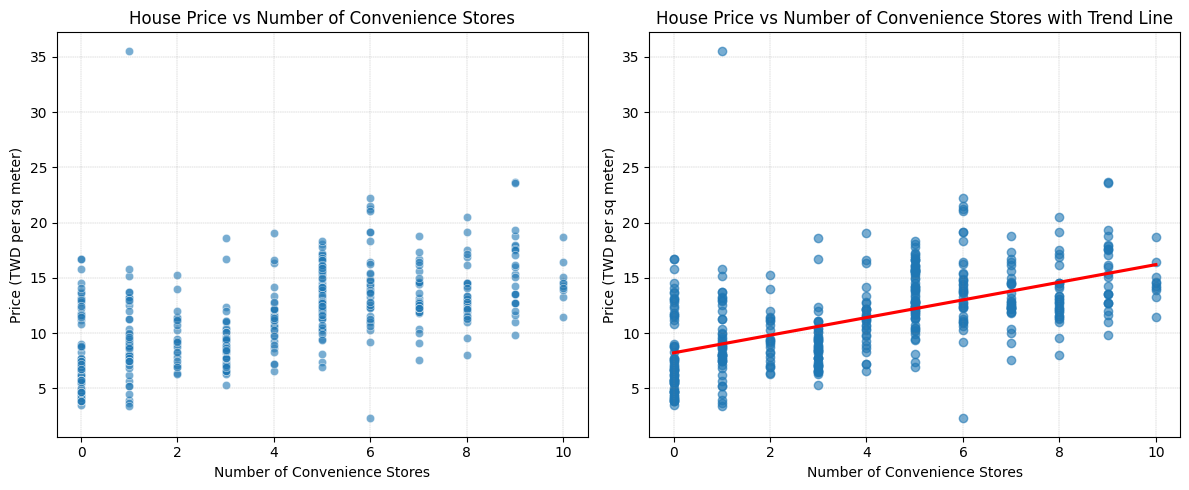

In [8]:
# Using taiwan_real_estate, draw a scatter plot of "price_twd_msq" (y-axis) versus "n_convenience" (x-axis).

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot on the first subplot
sns.scatterplot(
    x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, alpha=0.6, ax=axes[0]
)
axes[0].set(
    xlabel="Number of Convenience Stores",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Number of Convenience Stores",
)
axes[0].grid(True, alpha=0.6, linestyle="--", linewidth=0.3, color="grey")

# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience on the second subplot
sns.regplot(
    x="n_convenience",
    y="price_twd_msq",
    data=taiwan_real_estate,
    ci=None,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6},
    ax=axes[1],
)
axes[1].set(
    xlabel="Number of Convenience Stores",
    ylabel="Price (TWD per sq meter)",
    title="House Price vs Number of Convenience Stores with Trend Line",
)
axes[1].grid(True, alpha=0.6, linestyle="--", linewidth=0.3, color="grey")

plt.tight_layout()
plt.show()

## The Anatomy of a Straight Line

A simple linear regression model is defined by a straight line. The equation for this line has two key parameters that the model must estimate from the data: the **intercept** and the **slope**.

  * **Intercept**: This is the predicted value of the response variable (`y`) when the explanatory variable (`x`) is equal to zero. Geometrically, it is the point where the regression line crosses the vertical y-axis.

  * **Slope**: This represents the predicted change in the response variable (`y`) for a one-unit increase in the explanatory variable (`x`). It quantifies both the direction (positive or negative) and the magnitude of the linear relationship.

These two parameters define the model's equation:

$$\text{response} = \text{intercept} + \text{slope} \times \text{explanatory}$$

The process of "fitting" the model involves finding the specific numerical values for the intercept and slope that create the line that best represents the data, typically by minimizing the residual sum of squares (Ordinary Least Squares).


### Fitting a Model with `statsmodels`

While `scikit-learn` is optimized for prediction, the `statsmodels` library is optimized for statistical inference and providing detailed insights into a model's parameters. It offers a highly readable, formula-based syntax for defining regression models, similar to the syntax used in the R programming language.

#### The Formula Syntax

`statsmodels` uses a formula string to define the relationship between variables. The formula follows the pattern `"response ~ explanatory_1 + explanatory_2 + ..."`. The tilde (`~`) can be read as "is modeled by". For a simple linear regression with one explanatory variable, the formula is simply `"response ~ explanatory"`.

#### The Fitting Process

Fitting a model with `statsmodels.formula.api` is a two-step process:

1.  **Define the model**: You import the `ols` (Ordinary Least Squares) function and pass it the formula string and your DataFrame. This creates a model object but does not perform any calculations yet.
2.  **Fit the model**: You call the `.fit()` method on the model object. This executes the OLS algorithm to find the optimal values for the slope and intercept.


```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'explanatory_var': np.linspace(0, 100, 200),
    'response_var': 20 + 3.5 * np.linspace(0, 100, 200) + np.random.normal(0, 40, 200)
})

# 1. Define the model using the formula syntax
# The formula "response_var ~ explanatory_var" specifies the model's structure.
mdl_simple_regression = smf.ols(formula="response_var ~ explanatory_var", data=df)

# 2. Fit the model to the data
results = mdl_simple_regression.fit()

# The fitted parameters (intercept and slope) can be accessed via .params
print(results.params)
```

### Interpreting the Model Coefficients

The `results.params` attribute contains the estimated values for the intercept and the slope(s). These coefficients are the core output of the fitted model and form our predictive equation.

Based on the output from the code above, we might get something like:

```python
Intercept          19.939221
explanatory_var     3.515298
dtype: float64
```

We can now write the final equation for our regression line:

$$\text{response\_var} = 19.94 + 3.52 \times \text{explanatory\_var}$$

The interpretation of these coefficients is as follows:

  * **Intercept (19.94)**: The model predicts that when the `explanatory_var` is **zero**, the `response_var` will have a value of **19.94**. It is crucial to consider whether an explanatory variable of zero is a realistic or meaningful value in your data. If `x=0` is far outside the range of your observed data, the intercept may simply be a statistical construct needed to position the line correctly, rather than a meaningful real-world prediction.

  * **Slope (3.52)**: For **each one-unit increase** in `explanatory_var`, the model predicts that `response_var` will **increase by an average of 3.52 units**. The slope is often the most important part of the model, as it quantifies the relationship between the two variables.

In [9]:
# Import the ols() function from the statsmodels.formula.api package.
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols(
    formula="price_twd_msq ~ n_convenience", data=taiwan_real_estate
)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


## The Challenge of Categorical Features

Linear regression models require numeric inputs. When we provide a categorical explanatory variable (like a product `category` or animal `species`), it cannot be used directly in the mathematical equation. Instead, statistical libraries like `statsmodels` automatically convert the single categorical column into a set of binary **indicator variables** (also called "dummy variables") behind the scenes. This process allows the model to estimate a different mean response for each category.

### Exploration: Visualization and Summary Statistics

Before modeling, it's essential to explore the relationship between the categorical explanatory variable and the numeric response variable.

  * **Visualization**: A simple scatter plot is not effective here. Instead, visualizations that show the *distribution* of the numeric variable for each category are ideal. A **boxplot** or **violin plot** is excellent for this, as it clearly shows the median, spread, and potential outliers for each group.

  * **Summary Statistics**: The most direct way to get a numerical summary is to calculate the mean of the response variable for each category using the `.groupby()` method in pandas. This gives us the exact values that our regression model will attempt to estimate.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Create a generic, reproducible dataset
np.random.seed(42)
data = {
    'category': np.random.choice(['Alpha', 'Bravo', 'Charlie'], 150),
    'response_value': np.random.randn(150)
}
df = pd.DataFrame(data)

# Adjust means for each category to create a clear difference
df.loc[df['category'] == 'Alpha', 'response_value'] += 10
df.loc[df['category'] == 'Bravo', 'response_value'] += 15
df.loc[df['category'] == 'Charlie', 'response_value'] += 5

#  1. Calculate summary statistics 
category_means = df.groupby('category')['response_value'].mean()
print(category_means)

# 2. Visualize the distributions 
# Create a figure and axis using matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Create boxplot using seaborn's object-oriented approach
sns.boxplot(data=df, x='category', y='response_value', ax=ax)

# Customize the plot
ax.set_title('Distribution of Response Value by Category')
ax.grid(True, linestyle='--')

# Display the plot
plt.show()
```

### Model 1: Linear Regression with an Intercept (The Default)

When you fit a standard `ols` model, `statsmodels` automatically selects one category to be the **reference level** (typically the first one alphabetically). The model's coefficients are then interpreted relative to this reference.

  * The **Intercept** of the model is the **mean of the reference category**.
  * The **coefficient for each other category** is the **difference** between the mean of that category and the mean of the reference category (the intercept).

```python
# Fit a linear regression model with an intercept (default behavior)
# The formula "response_value ~ category" models the response based on the category.
mdl_with_intercept = smf.ols(formula="response_value ~ category", data=df).fit()

print(mdl_with_intercept.params)
```

The output will look similar to this:

```
Intercept                10.025
category[T.Bravo]         4.978
category[T.Charlie]      -5.084
dtype: float64
```

**Interpretation**:

  * The reference category is `Alpha` (alphabetically first). The `Intercept` of **10.025** is the mean of the `Alpha` category.
  * The coefficient for `category[T.Bravo]` is **4.978**. This means the average `response_value` for the `Bravo` category is 4.978 units *higher* than the `Alpha` category.
      * Verification: `10.025 (Alpha mean) + 4.978 = 15.003` (which matches the calculated mean for `Bravo`).
  * The coefficient for `category[T.Charlie]` is **-5.084**. This means the average `response_value` for the `Charlie` category is 5.084 units *lower* than the `Alpha` category.
      * Verification: `10.025 (Alpha mean) - 5.084 = 4.941` (which matches the calculated mean for `Charlie`).


### Model 2: Linear Regression without an Intercept

For a more direct interpretation, you can fit a model *without* an intercept. In this case, there is no reference level, and each coefficient directly represents the mean of its corresponding category. This is often more intuitive.

  * **How**: To remove the intercept, you explicitly add `+ 0` or `- 1` to the model formula.


```python
# Fit a linear regression model WITHOUT an intercept
mdl_no_intercept = smf.ols(formula="response_value ~ category + 0", data=df).fit()

print(mdl_no_intercept.params)
```

The output will look similar to this:

```
category[Alpha]      10.025
category[Bravo]      15.003
category[Charlie]     4.941
dtype: float64
```

**Interpretation**:

  * The coefficient for `category[Alpha]` of **10.025** is the mean `response_value` for the `Alpha` category.
  * The coefficient for `category[Bravo]` of **15.003** is the mean `response_value` for the `Bravo` category.
  * The coefficient for `category[Charlie]` of **4.941** is the mean `response_value` for the `Charlie` category.

These values directly match the means we calculated earlier with `.groupby()`, making this model's output very easy to interpret. The choice between these two model forms depends on whether you are more interested in the absolute mean of each group or in the differences between groups relative to a baseline.

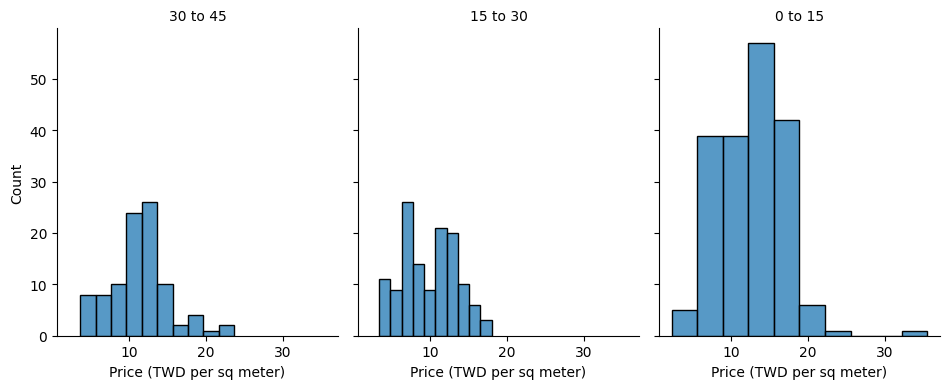

In [10]:
# Create a FacetGrid to make histograms of price_twd_msq split by house_age_years
g = sns.FacetGrid(data=taiwan_real_estate, col="house_age_years", col_wrap=3, height=4, aspect=0.8)
g.map_dataframe(sns.histplot, x="price_twd_msq", bins=10)
g.set_axis_labels("Price (TWD per sq meter)", "Count")
g.set_titles("{col_name}")
plt.show()

### Calculating means by category
A good way to explore categorical variables further is to calculate summary statistics for each category. For example, you can calculate the mean and median of your response variable, grouped by a categorical variable. As such, you can compare each category in more detail.

Here, you'll look at grouped means for the house prices in the Taiwan real estate dataset. This will help you understand the output of a linear regression with a categorical variable.

In [13]:
# Group taiwan_real_estate by house_age_years and calculate the mean price (price_twd_msq) for each age group. Assign the result to mean_price_by_age.
mean_price_by_age = taiwan_real_estate.groupby("house_age_years")["price_twd_msq"].mean()
display(mean_price_by_age.round(3))

house_age_years
0 to 15     12.637
15 to 30     9.877
30 to 45    11.393
Name: price_twd_msq, dtype: float64

### Linear regression with a categorical explanatory variable
To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

In [15]:
# Run and fit a linear regression with price_twd_msq as the response variable, house_age_years as the explanatory variable, and taiwan_real_estate as the dataset. Assign to mdl_price_vs_age.
from statsmodels.formula.api import ols

mdl_price_vs_age = ols(formula="price_twd_msq ~ house_age_years", data=taiwan_real_estate).fit()

print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


In [16]:
# Update the model formula so that no intercept is included in the model. Assign to mdl_price_vs_age0.
mdl_price_vs_age0 = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()

print(mdl_price_vs_age0.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


## The Goal of Prediction

The primary purpose of building a regression model is to make predictions. After fitting the model, it has learned the mathematical relationship between the explanatory variable(s) and the response variable. For a simple linear regression, this relationship is captured by the equation of a line:

$$\text{response} = \text{intercept} + \text{slope} \times \text{explanatory}$$

Prediction is the process of using this learned equation to estimate the `response` for any given value of the `explanatory` variable.

### Fitting the Model (Recap)

Before we can predict, we must first fit a model to our data. We will use `statsmodels` to learn the `intercept` and `slope` from a sample dataset.

```python
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

# Create a generic, reproducible dataset
np.random.seed(42)
df = pd.DataFrame({
    'feature_val': np.linspace(20, 40, 50),
    'target_val': 50 + 4.5 * np.linspace(20, 40, 50) + np.random.normal(0, 25, 50)
})

# Fit a simple linear regression model
mdl_fitted = smf.ols(formula="target_val ~ feature_val", data=df).fit()

# Display the learned parameters
print(mdl_fitted.params)
```

The output provides the intercept and the slope for `feature_val`, defining our predictive equation.

### Generating and Using Predictions

To make predictions, we follow a three-step process: create new explanatory data, use the `.predict()` method, and then organize the results.

#### Step 1: Create New Explanatory Data

We don't typically predict on the data we used for training. Instead, we create a new DataFrame that contains the specific values of the explanatory variable(s) for which we want to generate predictions. **Crucially, the column name(s) in this new DataFrame must exactly match the feature name(s) used in the model's formula.**

```python
# Create a DataFrame with a range of feature values for which we want predictions
explanatory_data = pd.DataFrame({
    "feature_val": np.arange(20, 41) # Predict for values from 20 to 40
})

print(explanatory_data.head())
```

#### Step 2: Use the `.predict()` Method

The `.predict()` method of the fitted model takes the new explanatory data as an argument and returns a pandas Series containing the corresponding predicted values for the target variable.

```python
# Use the fitted model to make predictions on the new data
predictions = mdl_fitted.predict(explanatory_data)

print(predictions.head())
```

### Step 3: Organize the Predictions in a DataFrame

It is good practice to combine your explanatory data and its predictions into a single, tidy DataFrame. The `.assign()` method is a clean, pythonic way to add the predictions as a new column.

```python
# Add the predictions as a new column to the explanatory data
prediction_data = explanatory_data.assign(
    predicted_target=predictions
)

print(prediction_data.head())
```

This `prediction_data` DataFrame now clearly shows each input feature value and its corresponding model-predicted target value.


### Visualizing Predictions

A powerful way to understand your model's predictions is to visualize them alongside the original data and the regression line. We can layer a scatter plot of our predictions on top of a `seaborn.regplot` of the original data. The predicted points should fall exactly on the fitted line.

```python
# Create a figure with seaborn's object-oriented approach
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data and regression line using seaborn
sns.regplot(x="feature_val", y="target_val", data=df, ci=None, ax=ax,
            scatter_kws={'alpha': 0.6, 'color': 'steelblue'}, 
            line_kws={'color': 'navy', 'linewidth': 2})

# Overlay the predicted points
sns.scatterplot(x="feature_val", y="predicted_target", data=prediction_data, 
                color="red", marker="s", s=80, alpha=0.8, 
                label="Model Predictions", ax=ax)

# Enhance the plot aesthetics
ax.set_title("Linear Regression: Original Data vs Model Predictions", 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel("Feature Value", fontsize=12)
ax.set_ylabel("Target Value", fontsize=12)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)

# Apply a clean seaborn style
sns.despine()
plt.tight_layout()
plt.show()
```

### The Danger of Extrapolation

**Extrapolation** is the act of making predictions for explanatory variable values that fall far outside the range of the data used to train the model. This is a highly risky practice.

A linear regression model only "knows" about the relationship between variables within the range of the observed data. There is no guarantee that this linear relationship holds true outside of that range. Using the model to extrapolate can lead to nonsensical or dangerously misleading predictions.

```python
# Create a DataFrame with a value far outside the original range (20 to 40)
extrapolate_data = pd.DataFrame({"feature_val": [10]})

# Predict on this extrapolated value
extrapolated_prediction = mdl_fitted.predict(extrapolate_data)

print(f"Prediction for feature_val=10: {extrapolated_prediction[0]:.2f}")
```

The model will dutifully apply its formula and produce a result. However, because we have no data in the region of `feature_val=10`, we have no evidence to suggest this prediction is reliable. For example, if the feature were length and the target were mass, this could predict a negative mass, which is physically impossible. **Predictions are only trustworthy within or very near the range of the original training data.**